<a href="https://colab.research.google.com/github/yousefMohamed2002/Assignment-2-Selected-Topic-Reinforcement-Learning-DQN-Acrobot-v1/blob/karim/assignment_2_selected_topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gym torch  matplotlib
!pip install numpy==1.26
!pip install pygame

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# import gymnasium as gym
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import random
# import numpy as np
# from collections import deque
# import matplotlib.pyplot as plt

# # Create environment using gymnasium
# env = gym.make('Acrobot-v1', render_mode="rgb_array")

# class DQN(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(DQN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.fc2 = nn.Linear(128, 128)
#         self.fc3 = nn.Linear(128, output_dim)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         return self.fc3(x)

# # Hyperparameters
# learning_rate = 0.001
# gamma = 0.99
# epsilon = 1.0
# epsilon_min = 0.01
# epsilon_decay = 0.995
# batch_size = 64
# target_update_freq = 1000
# memory_size = 10000
# episodes = 1000

# # Initialize Q-networks
# input_dim = env.observation_space.shape[0]
# output_dim = env.action_space.n
# policy_net = DQN(input_dim, output_dim)
# target_net = DQN(input_dim, output_dim)
# target_net.load_state_dict(policy_net.state_dict())
# target_net.eval()

# optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
# memory = deque(maxlen=memory_size)

# # Function to choose action using epsilon-greedy policy
# def select_action(state, epsilon):
#     if random.random() < epsilon:
#         return env.action_space.sample()  # Explore
#     else:
#         state = torch.tensor(state, dtype=torch.float32).unsqueeze(0)
#         with torch.no_grad():
#             q_values = policy_net(state)
#         return torch.argmax(q_values).item()  # Exploit

# # Function to optimize the model using experience replay
# def optimize_model():
#     if len(memory) < batch_size:
#         return

#     batch = random.sample(memory, batch_size)
#     state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

#     state_batch = torch.tensor(np.array(state_batch), dtype=torch.float32)
#     action_batch = torch.tensor(np.array(action_batch)).unsqueeze(1)
#     reward_batch = torch.tensor(np.array(reward_batch), dtype=torch.float32)
#     next_state_batch = torch.tensor(np.array(next_state_batch), dtype=torch.float32)
#     done_batch = torch.tensor(np.array(done_batch), dtype=torch.float32)

#     q_values = policy_net(state_batch).gather(1, action_batch).squeeze()
#     with torch.no_grad():
#         max_next_q_values = target_net(next_state_batch).max(1)[0]
#         target_q_values = reward_batch + gamma * max_next_q_values * (1 - done_batch)

#     loss = nn.MSELoss()(q_values, target_q_values)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

# # Main training loop
# rewards_per_episode = []
# steps_done = 0

# for episode in range(episodes):
#     state, _ = env.reset()
#     episode_reward = 0
#     done = False

#     while not done:
#         action = select_action(state, epsilon)
#         next_state, reward, terminated, truncated, _ = env.step(action)
#         done = terminated or truncated

#         memory.append((state, action, reward, next_state, done))
#         state = next_state
#         episode_reward += reward

#         optimize_model()

#         if steps_done % target_update_freq == 0:
#             target_net.load_state_dict(policy_net.state_dict())
#         steps_done += 1

#     epsilon = max(epsilon_min, epsilon_decay * epsilon)
#     rewards_per_episode.append(episode_reward)

#     if episode % 10 == 0:
#         print(f"Episode: {episode}, Reward: {episode_reward}, Epsilon: {epsilon:.2f}")

# # Plotting the rewards per episode
# plt.plot(rewards_per_episode)
# plt.xlabel('Episode')
# plt.ylabel('Reward')
# plt.title('DQN on Acrobot (Gymnasium)')
# plt.show()

# env.close()


Episode: 0, Reward: -500.0, Epsilon: 0.99
Episode: 10, Reward: -500.0, Epsilon: 0.95
Episode: 20, Reward: -489.0, Epsilon: 0.90
Episode: 30, Reward: -500.0, Epsilon: 0.86
Episode: 40, Reward: -461.0, Epsilon: 0.81
Episode: 50, Reward: -500.0, Epsilon: 0.77
Episode: 60, Reward: -299.0, Epsilon: 0.74
Episode: 70, Reward: -356.0, Epsilon: 0.70
Episode: 80, Reward: -304.0, Epsilon: 0.67
Episode: 90, Reward: -228.0, Epsilon: 0.63
Episode: 100, Reward: -500.0, Epsilon: 0.60
Episode: 110, Reward: -185.0, Epsilon: 0.57
Episode: 120, Reward: -175.0, Epsilon: 0.55
Episode: 130, Reward: -201.0, Epsilon: 0.52
Episode: 140, Reward: -175.0, Epsilon: 0.49
Episode: 150, Reward: -206.0, Epsilon: 0.47
Episode: 160, Reward: -167.0, Epsilon: 0.45
Episode: 170, Reward: -231.0, Epsilon: 0.42
Episode: 180, Reward: -149.0, Epsilon: 0.40
Episode: 190, Reward: -199.0, Epsilon: 0.38
Episode: 200, Reward: -169.0, Epsilon: 0.37
Episode: 210, Reward: -199.0, Epsilon: 0.35
Episode: 220, Reward: -98.0, Epsilon: 0.33


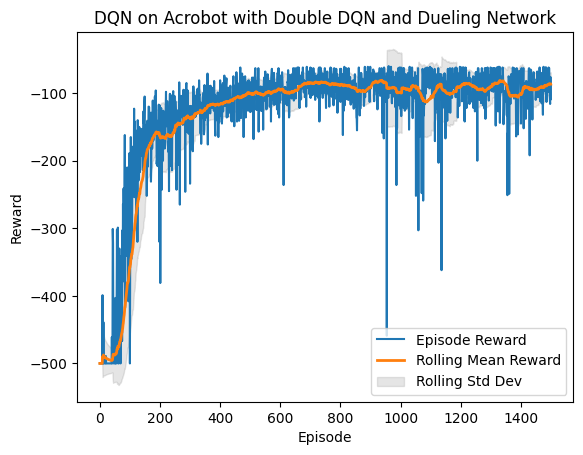

Final Mean Reward: -90.23639999999999
Final Standard Deviation of Reward: 2.5530458358595904


In [ ]:
# import gymnasium as gym
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import random
# import numpy as np
# from collections import deque
# import matplotlib.pyplot as plt
# import torch.nn.functional as F

# # Create environment with new step API
# env = gym.make('Acrobot-v1', render_mode="rgb_array")

# # Preprocess state to normalize angular velocities
# def preprocess_state(state):
#     norm_state = np.array(state)
#     norm_state[4] = np.clip(norm_state[4] / 4.0, -1.0, 1.0)  # Normalize theta_dot1
#     norm_state[5] = np.clip(norm_state[5] / 9.0, -1.0, 1.0)  # Normalize theta_dot2
#     return norm_state

# # Define Dueling DQN Network
# class DuelingDQN(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(DuelingDQN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.fc2 = nn.Linear(128, 128)

#         # Value stream
#         self.value_stream = nn.Linear(128, 1)

#         # Advantage stream
#         self.advantage_stream = nn.Linear(128, output_dim)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))

#         value = self.value_stream(x)
#         advantage = self.advantage_stream(x)

#         # Q-values = Value + (Advantage - Mean(Advantage))
#         q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
#         return q_values

# # Hyperparameters
# learning_rate = 0.001
# gamma = 0.99
# epsilon = 1.0
# epsilon_min = 0.01
# epsilon_decay = 0.995
# batch_size = 64
# target_update_freq = 1000
# memory_size = 10000
# episodes = 1500
# window_size = 50  # For calculating rolling mean and std dev

# # Initialize Q-networks
# input_dim = env.observation_space.shape[0]
# output_dim = env.action_space.n
# policy_net = DuelingDQN(input_dim, output_dim)
# target_net = DuelingDQN(input_dim, output_dim)
# target_net.load_state_dict(policy_net.state_dict())
# target_net.eval()

# optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
# memory = deque(maxlen=memory_size)

# # Function to choose action using epsilon-greedy policy
# def select_action(state, epsilon):
#     if random.random() < epsilon:
#         return env.action_space.sample()  # Explore
#     else:
#         state = torch.FloatTensor(state).unsqueeze(0)
#         with torch.no_grad():
#             q_values = policy_net(state)
#         return torch.argmax(q_values).item()  # Exploit

# # Function to optimize the model using experience replay
# def optimize_model():
#     if len(memory) < batch_size:
#         return

#     batch = random.sample(memory, batch_size)
#     state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

#     state_batch = torch.FloatTensor(np.array(state_batch))
#     action_batch = torch.LongTensor(np.array(action_batch)).unsqueeze(1)
#     reward_batch = torch.FloatTensor(np.array(reward_batch, dtype=np.float64))
#     next_state_batch = torch.FloatTensor(np.array(next_state_batch))
#     done_batch = torch.FloatTensor(np.array(done_batch, dtype=np.float64))

#     # Double DQN: use policy network to select actions for the next state, target network to estimate Q-values
#     q_values = policy_net(state_batch).gather(1, action_batch).squeeze()
#     with torch.no_grad():
#         next_action_batch = policy_net(next_state_batch).argmax(1, keepdim=True)
#         next_q_values = target_net(next_state_batch).gather(1, next_action_batch).squeeze()
#         target_q_values = reward_batch + gamma * next_q_values * (1 - done_batch)

#     loss = F.mse_loss(q_values, target_q_values)

#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

# # Main training loop
# rewards_per_episode = []
# mean_rewards = []
# std_rewards = []
# steps_done = 0

# for episode in range(episodes):
#     # Handle different Gym API versions for reset()
#     reset_result = env.reset()
#     state, _ = reset_result  # New step API returns a tuple of (state, info)
#     state = preprocess_state(state)  # Normalize state

#     episode_reward = 0
#     done = False

#     while not done:
#         # Select action
#         action = select_action(state, epsilon)

#         # Handle different Gym API versions for step()
#         step_result = env.step(action)
#         next_state, reward, terminated, truncated, info = step_result
#         done = terminated or truncated

#         # Normalize next state
#         next_state = preprocess_state(next_state)

#         # Store transition in memory
#         memory.append((state, action, reward, next_state, done))

#         # Update state
#         state = next_state
#         episode_reward += reward

#         # Optimize model
#         optimize_model()

#         # Update target network periodically
#         if steps_done % target_update_freq == 0:
#             target_net.load_state_dict(policy_net.state_dict())

#         steps_done += 1

#     # Decay epsilon
#     epsilon = max(epsilon_min, epsilon_decay * epsilon)

#     rewards_per_episode.append(episode_reward)

#     # Calculate rolling mean and std dev of rewards
#     if len(rewards_per_episode) >= window_size:
#         recent_rewards = rewards_per_episode[-window_size:]
#         mean_rewards.append(np.mean(recent_rewards))
#         std_rewards.append(np.std(recent_rewards))
#     else:
#         mean_rewards.append(np.mean(rewards_per_episode))
#         std_rewards.append(np.std(rewards_per_episode))

#     if episode % 10 == 0:
#         print(f"Episode: {episode}, Reward: {episode_reward}, Epsilon: {epsilon:.2f}")

# # Plotting the rewards per episode with mean and std dev
# plt.plot(rewards_per_episode, label="Episode Reward")
# plt.plot(mean_rewards, label="Rolling Mean Reward", linewidth=2)
# plt.fill_between(range(len(mean_rewards)), np.array(mean_rewards) - np.array(std_rewards), np.array(mean_rewards) + np.array(std_rewards), color='gray', alpha=0.2, label="Rolling Std Dev")
# plt.xlabel('Episode')
# plt.ylabel('Reward')
# plt.title('DQN on Acrobot with Double DQN and Dueling Network')
# plt.legend()
# plt.show()

# # Print final mean and standard deviation of rewards
# final_mean_reward = np.mean(mean_rewards[-window_size:]) if len(mean_rewards) >= window_size else np.mean(mean_rewards)
# final_std_reward = np.std(mean_rewards[-window_size:]) if len(mean_rewards) >= window_size else np.std(mean_rewards)

# print(f"Final Mean Reward: {final_mean_reward}")
# print(f"Final Standard Deviation of Reward: {final_std_reward}")

# # Close the environment
# env.close()



=== Training for 10000 timesteps ===
Evaluation -> Mean Reward: -500.00, Std: 0.00

=== Training for 20000 timesteps ===
Evaluation -> Mean Reward: -84.90, Std: 12.04

=== Training for 50000 timesteps ===
Evaluation -> Mean Reward: -76.60, Std: 15.43

=== Training for 100000 timesteps ===
Evaluation -> Mean Reward: -68.50, Std: 7.97

=== Training for 200000 timesteps ===
Evaluation -> Mean Reward: -73.10, Std: 17.35


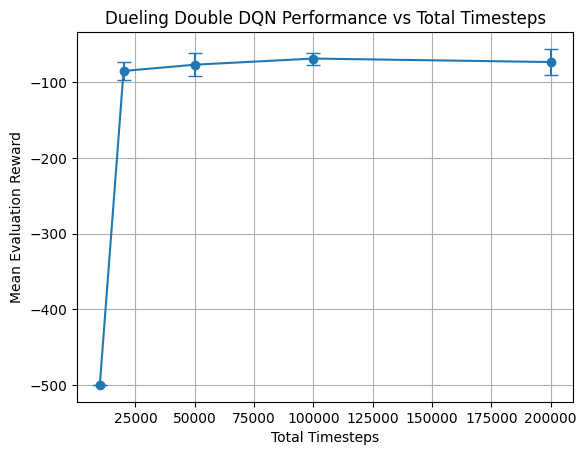


✅ Best performance at 100000 timesteps with mean reward -68.50
Model saved as: best_dqn_model_100000_timesteps.pth


In [ ]:
import gymnasium as gym
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

# Create environment
env = gym.make('Acrobot-v1', render_mode="rgb_array")

# Normalize angular velocities
def preprocess_state(state):
    norm_state = np.array(state)
    norm_state[4] = np.clip(norm_state[4] / 4.0, -1.0, 1.0)
    norm_state[5] = np.clip(norm_state[5] / 9.0, -1.0, 1.0)
    return norm_state

# Dueling DQN Model
class DuelingDQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DuelingDQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 128)
        self.value_stream = nn.Linear(128, 1)
        self.advantage_stream = nn.Linear(128, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        value = self.value_stream(x)
        advantage = self.advantage_stream(x)
        q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
        return q_values

# Hyperparameters
learning_rate = 0.001
gamma = 0.99
epsilon_min = 0.01
epsilon_decay = 0.999  # Slower decay for better exploration
batch_size = 128
target_update_freq = 1000
memory_size = 50000
total_timesteps_list = [10000, 20000, 50000, 100000, 200000]

input_dim = env.observation_space.shape[0]
output_dim = env.action_space.n

# Action selection
def select_action(state, epsilon, env, policy_net):
    if random.random() < epsilon:
        return env.action_space.sample()
    else:
        state = torch.FloatTensor(state).unsqueeze(0)
        with torch.no_grad():
            q_values = policy_net(state)
        return torch.argmax(q_values).item()

# Soft update function
def soft_update(target, source, tau=0.005):
    for target_param, source_param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(tau * source_param.data + (1.0 - tau) * target_param.data)

# Optimize model using Double DQN
def optimize_model(memory, policy_net, target_net, optimizer):
    if len(memory) < batch_size:
        return
    batch = random.sample(memory, batch_size)
    state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

    state_batch = torch.FloatTensor(np.array(state_batch))
    action_batch = torch.LongTensor(np.array(action_batch)).unsqueeze(1)
    reward_batch = torch.FloatTensor(np.array(reward_batch, dtype=np.float64))
    next_state_batch = torch.FloatTensor(np.array(next_state_batch))
    done_batch = torch.FloatTensor(np.array(done_batch, dtype=np.float64))

    # Optional: normalize rewards
    reward_batch = (reward_batch - reward_batch.mean()) / (reward_batch.std() + 1e-8)

    q_values = policy_net(state_batch).gather(1, action_batch).squeeze()

    with torch.no_grad():
        next_actions = policy_net(next_state_batch).argmax(1, keepdim=True)
        next_q_values = target_net(next_state_batch).gather(1, next_actions).squeeze()
        target_q_values = reward_batch + gamma * next_q_values * (1 - done_batch)

    loss = F.mse_loss(q_values, target_q_values)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Evaluate policy
def evaluate_policy(env, policy_net, episodes=10):
    rewards = []
    for _ in range(episodes):
        state, _ = env.reset()
        state = preprocess_state(state)
        done = False
        total_reward = 0
        while not done:
            with torch.no_grad():
                state_tensor = torch.FloatTensor(state).unsqueeze(0)
                action = torch.argmax(policy_net(state_tensor)).item()
            next_state, reward, terminated, truncated, _ = env.step(action)
            state = preprocess_state(next_state)
            done = terminated or truncated
            total_reward += reward
        rewards.append(total_reward)
    return np.mean(rewards), np.std(rewards)

# Main training loop
results = []

for total_timesteps in total_timesteps_list:
    print(f"\n=== Training for {total_timesteps} timesteps ===")

    policy_net = DuelingDQN(input_dim, output_dim)
    target_net = DuelingDQN(input_dim, output_dim)
    target_net.load_state_dict(policy_net.state_dict())
    target_net.eval()
    optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
    memory = deque(maxlen=memory_size)
    epsilon = 1.0
    steps_done = 0

    while steps_done < total_timesteps:
        state, _ = env.reset()
        state = preprocess_state(state)
        done = False

        while not done and steps_done < total_timesteps:
            action = select_action(state, epsilon, env, policy_net)
            next_state, reward, terminated, truncated, _ = env.step(action)
            next_state = preprocess_state(next_state)
            done = terminated or truncated

            # Optional reward shaping
            reward = np.clip(reward, -1.0, 1.0)

            memory.append((state, action, reward, next_state, done))
            state = next_state

            optimize_model(memory, policy_net, target_net, optimizer)
            soft_update(target_net, policy_net)

            epsilon = max(epsilon_min, epsilon_decay * epsilon)
            steps_done += 1

    # Evaluation
    mean_reward, std_reward = evaluate_policy(env, policy_net)
    print(f"Evaluation -> Mean Reward: {mean_reward:.2f}, Std: {std_reward:.2f}")
    results.append((total_timesteps, mean_reward, std_reward))

    # Save model for this timestep
    torch.save(policy_net.state_dict(), f"dqn_model_{total_timesteps}_timesteps.pth")

# Plotting
timesteps, mean_rewards, std_rewards = zip(*results)
plt.figure()
plt.errorbar(timesteps, mean_rewards, yerr=std_rewards, fmt='-o', capsize=5)
plt.title("Dueling Double DQN Performance vs Total Timesteps")
plt.xlabel("Total Timesteps")
plt.ylabel("Mean Evaluation Reward")
plt.grid()
plt.show()

# Save best model
best_idx = np.argmax(mean_rewards)
best_timesteps = total_timesteps_list[best_idx]
best_model = DuelingDQN(input_dim, output_dim)
best_model.load_state_dict(torch.load(f"dqn_model_{best_timesteps}_timesteps.pth"))
torch.save(best_model.state_dict(), f"best_dqn_model_{best_timesteps}_timesteps.pth")

print(f"\n✅ Best performance at {best_timesteps} timesteps with mean reward {mean_rewards[best_idx]:.2f}")
print(f"Model saved as: best_dqn_model_{best_timesteps}_timesteps.pth")

# Close environment
env.close()



=== Training for 10000 timesteps ===
Evaluation -> Mean Reward: -469.70, Std: 90.90

=== Training for 20000 timesteps ===
Evaluation -> Mean Reward: -83.80, Std: 12.80

=== Training for 50000 timesteps ===
Evaluation -> Mean Reward: -86.30, Std: 10.79

=== Training for 100000 timesteps ===
Evaluation -> Mean Reward: -96.80, Std: 19.79

=== Training for 200000 timesteps ===
Evaluation -> Mean Reward: -83.60, Std: 12.99

=== Training for 30000 timesteps ===
Evaluation -> Mean Reward: -144.00, Std: 120.89


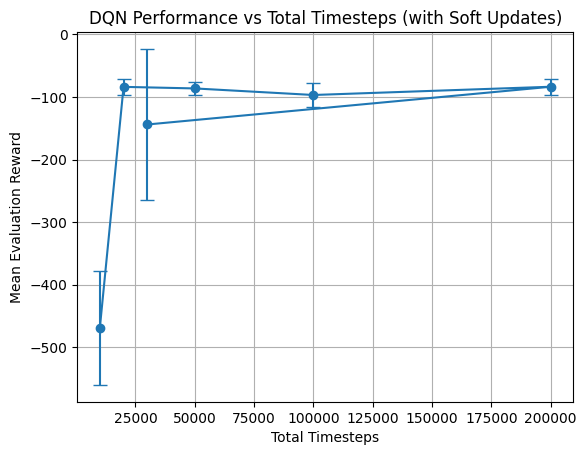


✅ Best performance at 200000 timesteps with mean reward -83.60
Model saved as: best_dqn_model_200000_timesteps.pth


In [ ]:
# import gymnasium as gym
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import random
# import numpy as np
# from collections import deque
# import matplotlib.pyplot as plt
# import torch.nn.functional as F

# # Create environment
# env = gym.make('Acrobot-v1', render_mode="rgb_array")

# # Normalize angular velocities
# def preprocess_state(state):
#     norm_state = np.array(state)
#     norm_state[4] = np.clip(norm_state[4] / 4.0, -1.0, 1.0)
#     norm_state[5] = np.clip(norm_state[5] / 9.0, -1.0, 1.0)
#     return norm_state

# # Dueling DQN Model
# class DuelingDQN(nn.Module):
#     def __init__(self, input_dim, output_dim):
#         super(DuelingDQN, self).__init__()
#         self.fc1 = nn.Linear(input_dim, 128)
#         self.fc2 = nn.Linear(128, 128)
#         self.value_stream = nn.Linear(128, 1)
#         self.advantage_stream = nn.Linear(128, output_dim)

#     def forward(self, x):
#         x = torch.relu(self.fc1(x))
#         x = torch.relu(self.fc2(x))
#         value = self.value_stream(x)
#         advantage = self.advantage_stream(x)
#         q_values = value + (advantage - advantage.mean(dim=1, keepdim=True))
#         return q_values

# # Hyperparameters
# learning_rate = 0.001
# gamma = 0.99
# epsilon_min = 0.01
# epsilon_decay = 0.995
# batch_size = 64
# memory_size = 10000
# total_timesteps_list = [10000, 20000, 50000, 100000, 200000,30000]

# input_dim = env.observation_space.shape[0]
# output_dim = env.action_space.n

# # Action selection
# def select_action(state, epsilon, env, policy_net):
#     if random.random() < epsilon:
#         return env.action_space.sample()
#     else:
#         state = torch.FloatTensor(state).unsqueeze(0)
#         with torch.no_grad():
#             q_values = policy_net(state)
#         return torch.argmax(q_values).item()

# # Optimize model
# def optimize_model(memory, policy_net, target_net, optimizer):
#     if len(memory) < batch_size:
#         return
#     batch = random.sample(memory, batch_size)
#     state_batch, action_batch, reward_batch, next_state_batch, done_batch = zip(*batch)

#     state_batch = torch.FloatTensor(np.array(state_batch))
#     action_batch = torch.LongTensor(np.array(action_batch)).unsqueeze(1)
#     reward_batch = torch.FloatTensor(np.array(reward_batch, dtype=np.float64))
#     next_state_batch = torch.FloatTensor(np.array(next_state_batch))
#     done_batch = torch.FloatTensor(np.array(done_batch, dtype=np.float64))

#     q_values = policy_net(state_batch).gather(1, action_batch).squeeze()
#     with torch.no_grad():
#         next_actions = policy_net(next_state_batch).argmax(1, keepdim=True)
#         next_q_values = target_net(next_state_batch).gather(1, next_actions).squeeze()
#         target_q_values = reward_batch + gamma * next_q_values * (1 - done_batch)

#     loss = F.mse_loss(q_values, target_q_values)
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()

# # Soft target update
# def soft_update(target_net, policy_net, tau=0.005):
#     for target_param, param in zip(target_net.parameters(), policy_net.parameters()):
#         target_param.data.copy_(tau * param.data + (1.0 - tau) * target_param.data)

# # Evaluate policy
# def evaluate_policy(env, policy_net, episodes=10):
#     rewards = []
#     for _ in range(episodes):
#         state, _ = env.reset()
#         state = preprocess_state(state)
#         done = False
#         total_reward = 0
#         while not done:
#             with torch.no_grad():
#                 state_tensor = torch.FloatTensor(state).unsqueeze(0)
#                 action = torch.argmax(policy_net(state_tensor)).item()
#             next_state, reward, terminated, truncated, _ = env.step(action)
#             state = preprocess_state(next_state)
#             done = terminated or truncated
#             total_reward += reward
#         rewards.append(total_reward)
#     return np.mean(rewards), np.std(rewards)

# # Main training loop across multiple timesteps
# results = []

# for total_timesteps in total_timesteps_list:
#     print(f"\n=== Training for {total_timesteps} timesteps ===")

#     policy_net = DuelingDQN(input_dim, output_dim)
#     target_net = DuelingDQN(input_dim, output_dim)
#     target_net.load_state_dict(policy_net.state_dict())
#     target_net.eval()
#     optimizer = optim.Adam(policy_net.parameters(), lr=learning_rate)
#     memory = deque(maxlen=memory_size)
#     epsilon = 1.0
#     steps_done = 0

#     while steps_done < total_timesteps:
#         state, _ = env.reset()
#         state = preprocess_state(state)
#         done = False

#         while not done and steps_done < total_timesteps:
#             action = select_action(state, epsilon, env, policy_net)
#             next_state, reward, terminated, truncated, _ = env.step(action)
#             next_state = preprocess_state(next_state)
#             done = terminated or truncated
#             memory.append((state, action, reward, next_state, done))
#             state = next_state

#             optimize_model(memory, policy_net, target_net, optimizer)

#             # Soft update instead of hard copy
#             soft_update(target_net, policy_net, tau=0.005)

#             epsilon = max(epsilon_min, epsilon_decay * epsilon)
#             steps_done += 1

#     # Evaluation
#     mean_reward, std_reward = evaluate_policy(env, policy_net)
#     print(f"Evaluation -> Mean Reward: {mean_reward:.2f}, Std: {std_reward:.2f}")
#     results.append((total_timesteps, mean_reward, std_reward))

# # Plotting
# timesteps, mean_rewards, std_rewards = zip(*results)
# plt.figure()
# plt.errorbar(timesteps, mean_rewards, yerr=std_rewards, fmt='-o', capsize=5)
# plt.title("DQN Performance vs Total Timesteps (with Soft Updates)")
# plt.xlabel("Total Timesteps")
# plt.ylabel("Mean Evaluation Reward")
# plt.grid()
# plt.show()

# # Save best model
# best_idx = np.argmax(mean_rewards)
# best_timesteps = total_timesteps_list[best_idx]
# best_model = DuelingDQN(input_dim, output_dim)
# best_model.load_state_dict(policy_net.state_dict())
# torch.save(best_model.state_dict(), f"best_dqn_model_{best_timesteps}_timesteps.pth")

# print(f"\n✅ Best performance at {best_timesteps} timesteps with mean reward {mean_rewards[best_idx]:.2f}")
# print(f"Model saved as: best_dqn_model_{best_timesteps}_timesteps.pth")

# # Close environment
# env.close()
